In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

import pandas as pd
import seaborn as sns

/home/nico/miniconda3/envs/data-science/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
file_path = "StudentsPerformance.csv"

df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "spscientist/students-performance-in-exams",
  file_path,
)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
rename_dict = {"race/ethnicity": "ethnicity", "parental level of education": "parental_education", "test preparation course": "test_prep",
               "math score": "math_score", "reading score": "reading_score", "writing score": "writing_score"}
df = df.rename(columns=rename_dict)

In [5]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df["avg_score"] = df[["math_score", "reading_score", "writing_score"]].mean(axis=1)

# Question 1

Does the parents education have an impact on the test scores?

In [7]:
def update_education(educ):
    """Shortens a string"""
    if educ == "some college":
        return "college"
    educ = educ.split()
    if len(educ) > 2:
        return educ[1]
    return educ[0].replace("'", "")

df["parental_education"] = df["parental_education"].map(update_education)

In [8]:
df["parental_education"].value_counts()

parental_education
high          375
college       226
associates    222
bachelors     118
masters        59
Name: count, dtype: int64

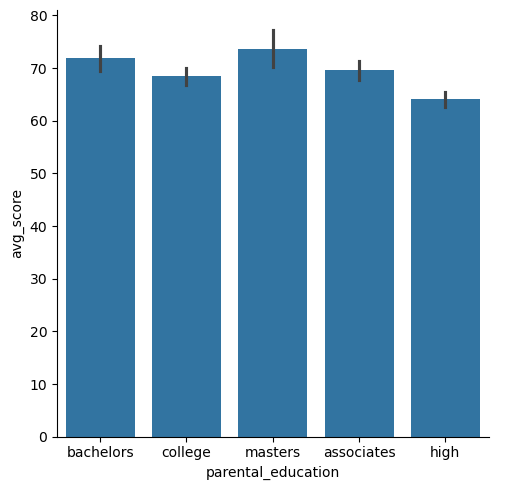

In [9]:
sns.catplot(data=df, kind="bar", x="parental_education", y="avg_score")

# Question 2

Is there some trend observable between parental education level and the ethnicity?

In [39]:
group_counts = ethnicity["parental_education"].value_counts(normalize=True)
group_counts = group_counts.reset_index()
group_counts.head()

,ethnicity,parental_education,proportion
0,group A,high,0.471910
1,group A,college,0.202247
2,group A,associates,0.157303
3,group A,bachelors,0.134831
4,group A,masters,0.033708


<Axes: xlabel='ethnicity', ylabel='proportion'>

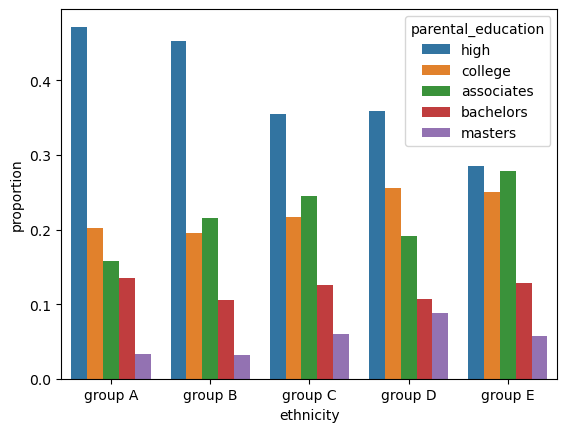

In [40]:
sns.barplot(group_counts, x="ethnicity", y="proportion", hue="parental_education")

<Axes: xlabel='ethnicity', ylabel='avg_score'>

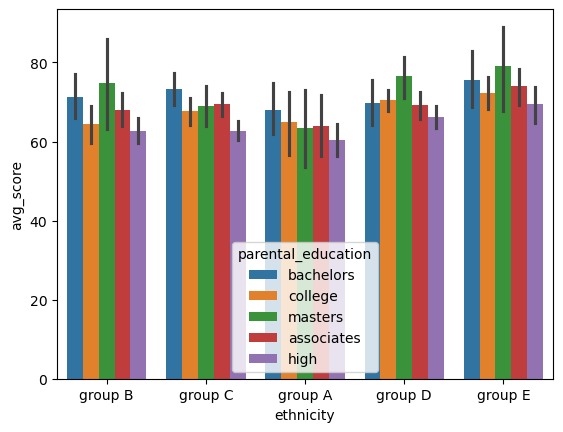

In [45]:
sns.barplot(df, x="ethnicity", y="avg_score", hue="parental_education")

# Question 3

Do children with parents that have a lower degree have a higher proportion of free/reduced lunch?

<Axes: xlabel='lunch', ylabel='proportion'>

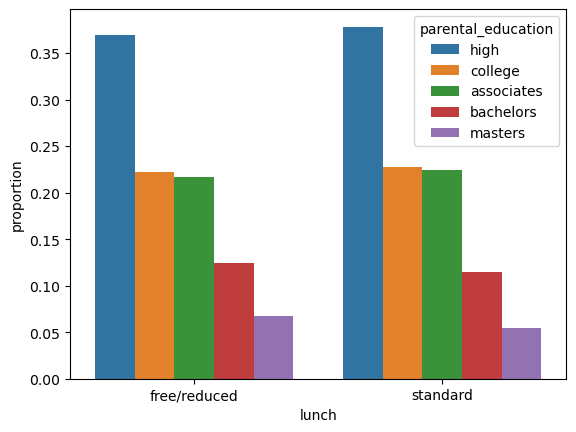

In [36]:
lunch = df.groupby("lunch")["parental_education"].value_counts(normalize=True)
lunch = lunch.reset_index()
sns.barplot(lunch, x="lunch", y="proportion", hue="parental_education")

# Question 4

Which subject has the highest average/spread?

In [46]:
df.head()

,gender,ethnicity,parental_education,lunch,test_prep,math_score,reading_score,writing_score,avg_score
0,female,group B,bachelors,standard,none,72,72,74,72.666667
1,female,group C,college,standard,completed,69,90,88,82.333333
2,female,group B,masters,standard,none,90,95,93,92.666667
3,male,group A,associates,free/reduced,none,47,57,44,49.333333
4,male,group C,college,standard,none,76,78,75,76.333333


In [9]:
melted = pd.melt(df, value_vars=["math_score", "reading_score", "writing_score", "avg_score"], value_name="score", var_name="score_type",
                 id_vars=["gender", "ethnicity", "parental_education", "lunch", "test_prep"])
melted.head()

,gender,ethnicity,parental_education,lunch,test_prep,score_type,score
0,female,group B,bachelors,standard,none,math_score,72.0
1,female,group C,college,standard,completed,math_score,69.0
2,female,group B,masters,standard,none,math_score,90.0
3,male,group A,associates,free/reduced,none,math_score,47.0
4,male,group C,college,standard,none,math_score,76.0


<Axes: xlabel='score_type', ylabel='score'>

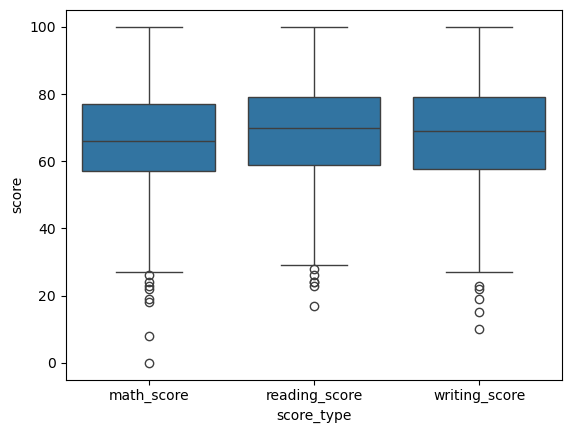

In [55]:
sns.boxplot(melted, x="score_type", y="score")

# Question 5

How do different genders perform per subject?

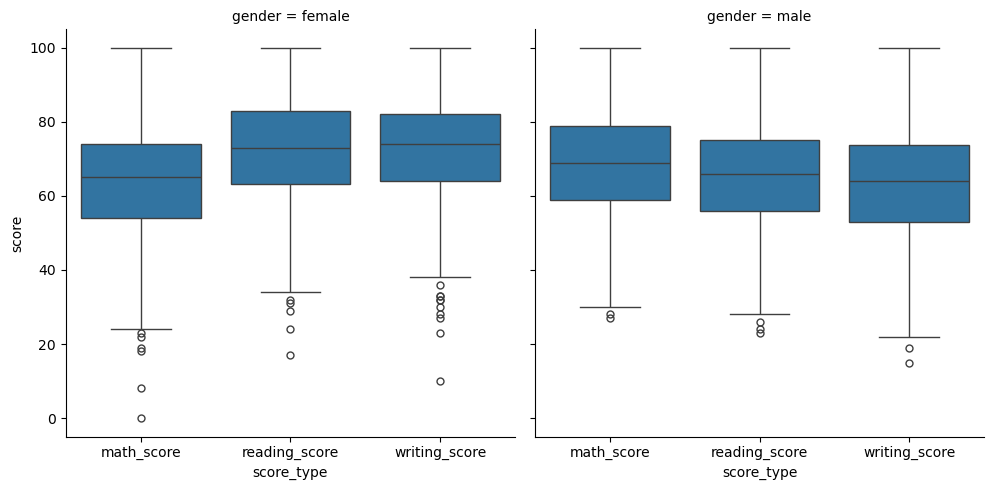

In [58]:
sns.catplot(melted, x="score_type", y="score", col="gender", kind="box")

# Question 6

Are reading and writing more correlated than math and writing?

In [62]:
correlations = df[["math_score", "reading_score", "writing_score"]].corr()

<Axes: >

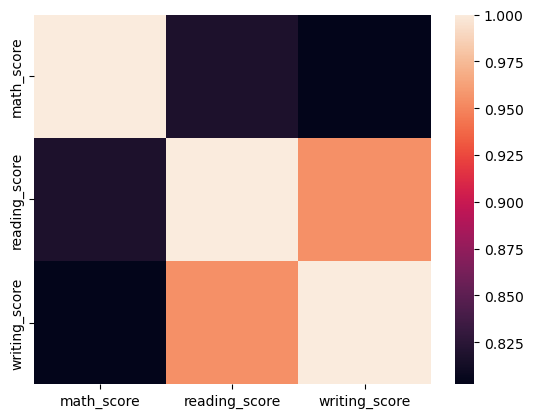

In [63]:
sns.heatmap(correlations)

# Question 7

Mean score per parental level of education

In [80]:
df.head()

,gender,ethnicity,parental_education,lunch,test_prep,math_score,reading_score,writing_score,avg_score
0,female,group B,bachelors,standard,none,72,72,74,72.666667
1,female,group C,college,standard,completed,69,90,88,82.333333
2,female,group B,masters,standard,none,90,95,93,92.666667
3,male,group A,associates,free/reduced,none,47,57,44,49.333333
4,male,group C,college,standard,none,76,78,75,76.333333


In [99]:
parental = df.groupby("parental_education").mean(numeric_only=True)
parental = parental.reset_index()
parental = pd.melt(parental, value_vars=["math_score", "reading_score", "writing_score", "avg_score"], var_name="subject", id_vars="parental_education")
parental = parental.sort_values("value", ascending=False)

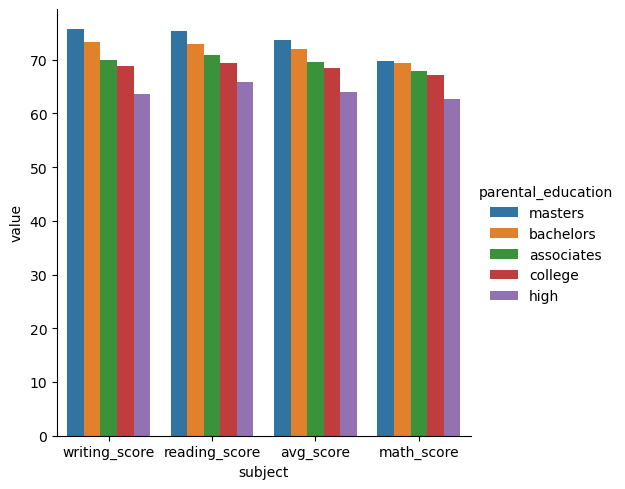

In [100]:
sns.catplot(parental, x="subject", y="value", hue="parental_education", kind="bar")

# Question 7

Which subject shows the biggest gap when compare standard vs. free lunch?

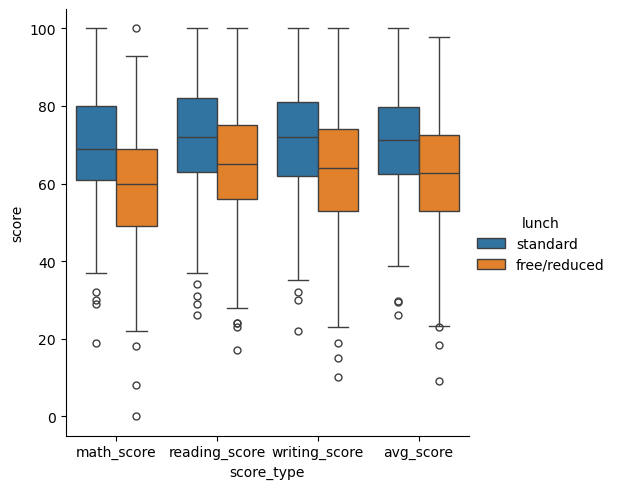

In [109]:
sns.catplot(melted, x="score_type", y="score", kind="box", hue="lunch")

# Question 8

Compare students with vs. without test preparation and add annotations at the mean

(array([-0.4,  0. ]), array([64., 64.]))
(array([0.6, 1. ]), array([67., 67.]))
(array([1.6, 2. ]), array([65., 65.]))
(array([2.6, 3. ]), array([65.33333333, 65.33333333]))
(array([5.55111512e-17, 4.00000000e-01]), array([69., 69.]))
(array([1. , 1.4]), array([75., 75.]))
(array([2. , 2.4]), array([76., 76.]))
(array([3. , 3.4]), array([73.5, 73.5]))


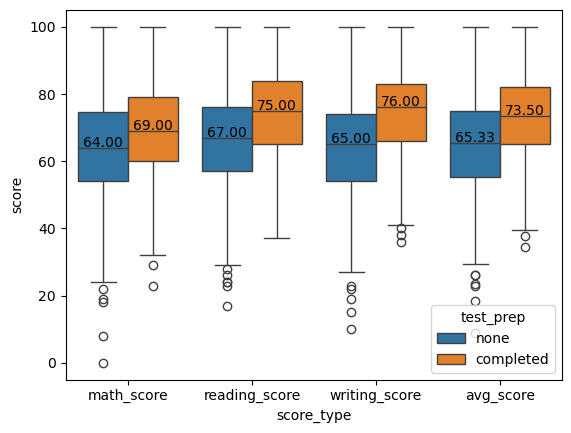

In [260]:
# median annotation
ax = sns.boxplot(melted, x="score_type", y="score", hue="test_prep")

lines = ax.get_lines()  # this contains all lines in the plot
boxes = [c for c in ax.get_children() if type(c).__name__ == "PathPatch"]
lines_per_box = int(len(lines) / len(boxes))
for median in lines[4:len(lines):lines_per_box]:    # as it seems, each 4th line is the horizontal median line
    print(median.get_data())
    x, y = (data.mean() for data in median.get_data())
    ax.text(x, y + 0.3, f"{y:.2f}", ha="center")

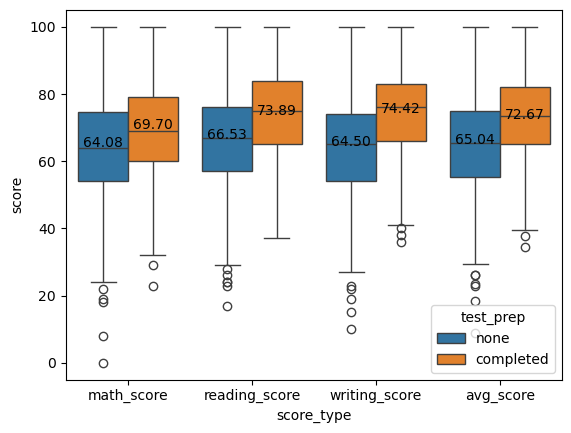

In [259]:
# mean annotation
ax = sns.boxplot(melted, x="score_type", y="score", hue="test_prep")
type_mean = melted.groupby(["score_type", "test_prep"])["score"].mean()

categories = ax.get_xticklabels()
labels = [t.get_text() for t in categories]
x_mapping = {label: i for i, label in enumerate(labels)}
for (score_type, test_prep), value in type_mean.items():
    x = x_mapping[score_type]
    x = x + 0.2 if test_prep == "completed" else x - 0.2
    ax.text(x, value, f"{value:.2f}", ha="center")

# Question 9

Does test prep help one gender more than the other on the math subset?

In [8]:
math_data = melted[melted["score_type"] == "math_score"]

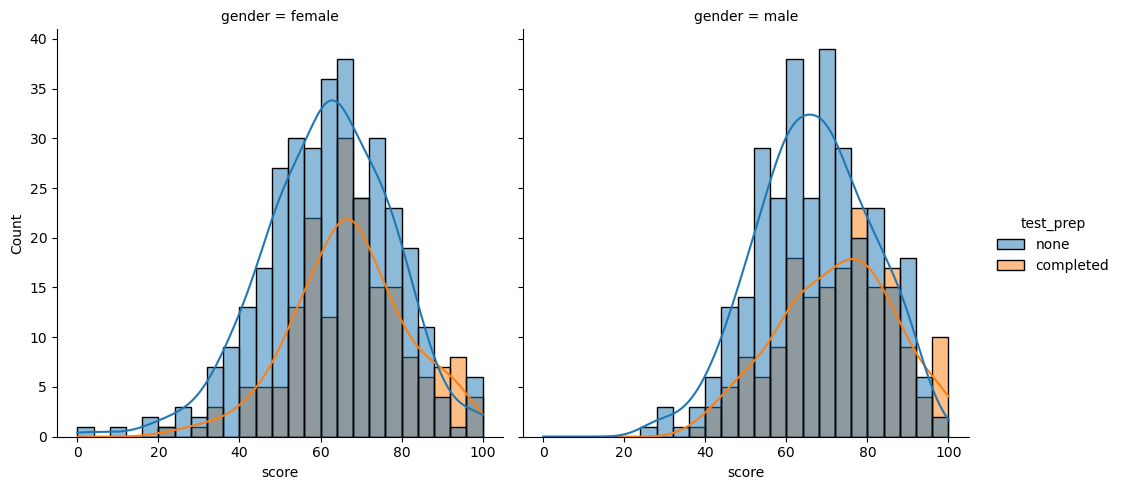

In [16]:
sns.displot(math_data, x="score", hue="test_prep", col="gender", kind="hist", kde=True)

# Question 10

Do different ethnicities have different results on math scores?

<Axes: ylabel='score'>

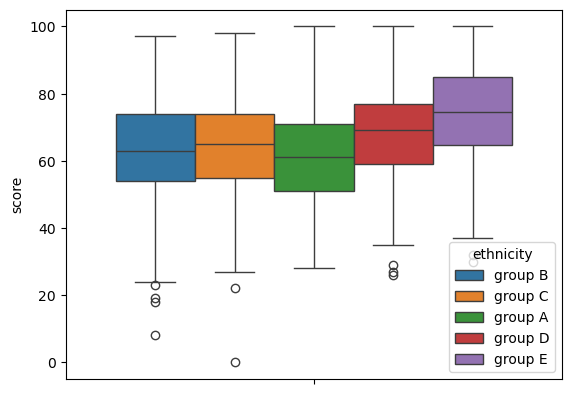

In [18]:
sns.boxplot(math_data, y="score", hue="ethnicity")

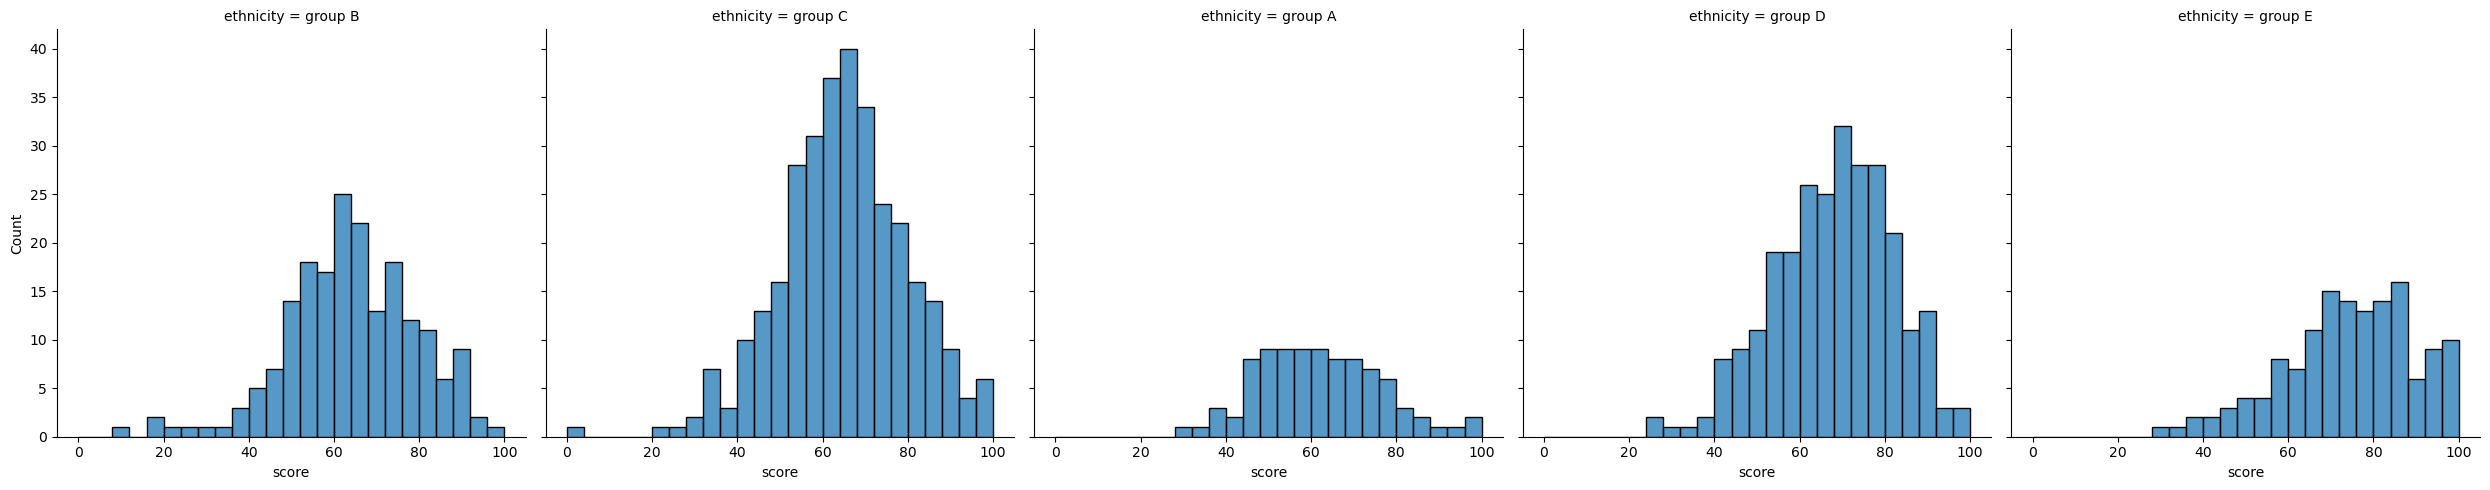

In [19]:
sns.displot(math_data, x="score", col="ethnicity")

# Question 11

Compare average score by gender, lunch or parental education.

In [20]:
df.head()

,gender,ethnicity,parental_education,lunch,test_prep,math_score,reading_score,writing_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


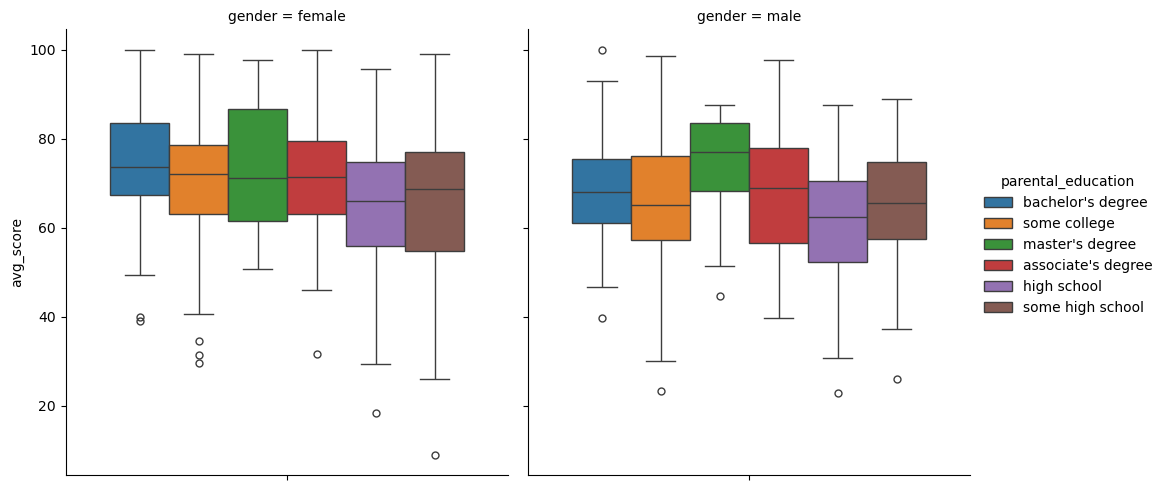

In [27]:
sns.catplot(df, y="avg_score", hue="parental_education", col="gender", kind="box")

# Question 12

Compute gaps between mean scores of groups gender, lunch and test prep and check whether there are any differences observable.

In [10]:
melted.head()

,gender,ethnicity,parental_education,lunch,test_prep,score_type,score
0,female,group B,bachelors,standard,none,math_score,72.0
1,female,group C,college,standard,completed,math_score,69.0
2,female,group B,masters,standard,none,math_score,90.0
3,male,group A,associates,free/reduced,none,math_score,47.0
4,male,group C,college,standard,none,math_score,76.0


In [32]:
from collections import defaultdict

subtractions = defaultdict(list)
for key in ["lunch", "gender", "test_prep"]:
    means = melted.groupby(key)["score"].mean()
    subtractions["feature"].append(key)
    subtractions["diff"].append(abs(means.iloc[0] - means.iloc[1]))
sub_df = pd.DataFrame(subtractions)
sub_df = sub_df.sort_values(by="diff", ascending=False)

<Axes: xlabel='feature', ylabel='diff'>

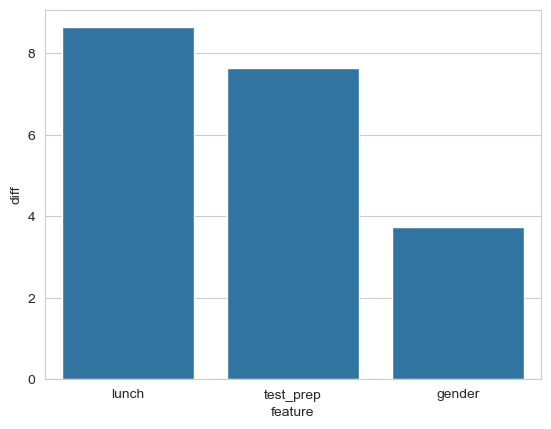

In [33]:
sns.barplot(sub_df, x="feature", y="diff")

# Question 13

In [65]:
# top and bottom 5 %
five_perc = int(len(df) * 0.05)
top5 = df.nlargest(five_perc, columns="avg_score")
top5["group"] = "top"
bottom5 = df.nsmallest(five_perc, columns="avg_score")
bottom5["group"] = "bottom"
outliers = pd.concat([top5, bottom5])
outliers.head()

,gender,ethnicity,parental_education,lunch,test_prep,math_score,reading_score,writing_score,avg_score,group
458,female,group E,bachelors,standard,none,100,100,100,100.000000,top
916,male,group E,bachelors,standard,completed,100,100,100,100.000000,top
962,female,group E,associates,standard,none,100,100,100,100.000000,top
114,female,group E,bachelors,standard,completed,99,100,100,99.666667,top
179,female,group D,high,standard,completed,97,100,100,99.000000,top


In [106]:
outliers_melt = outliers.melt(id_vars=["group"], var_name="feature", value_name="category",
                         value_vars=["lunch", "gender", "ethnicity", "parental_education", "test_prep"])
outliers_melt = outliers_melt.sort_values("category")

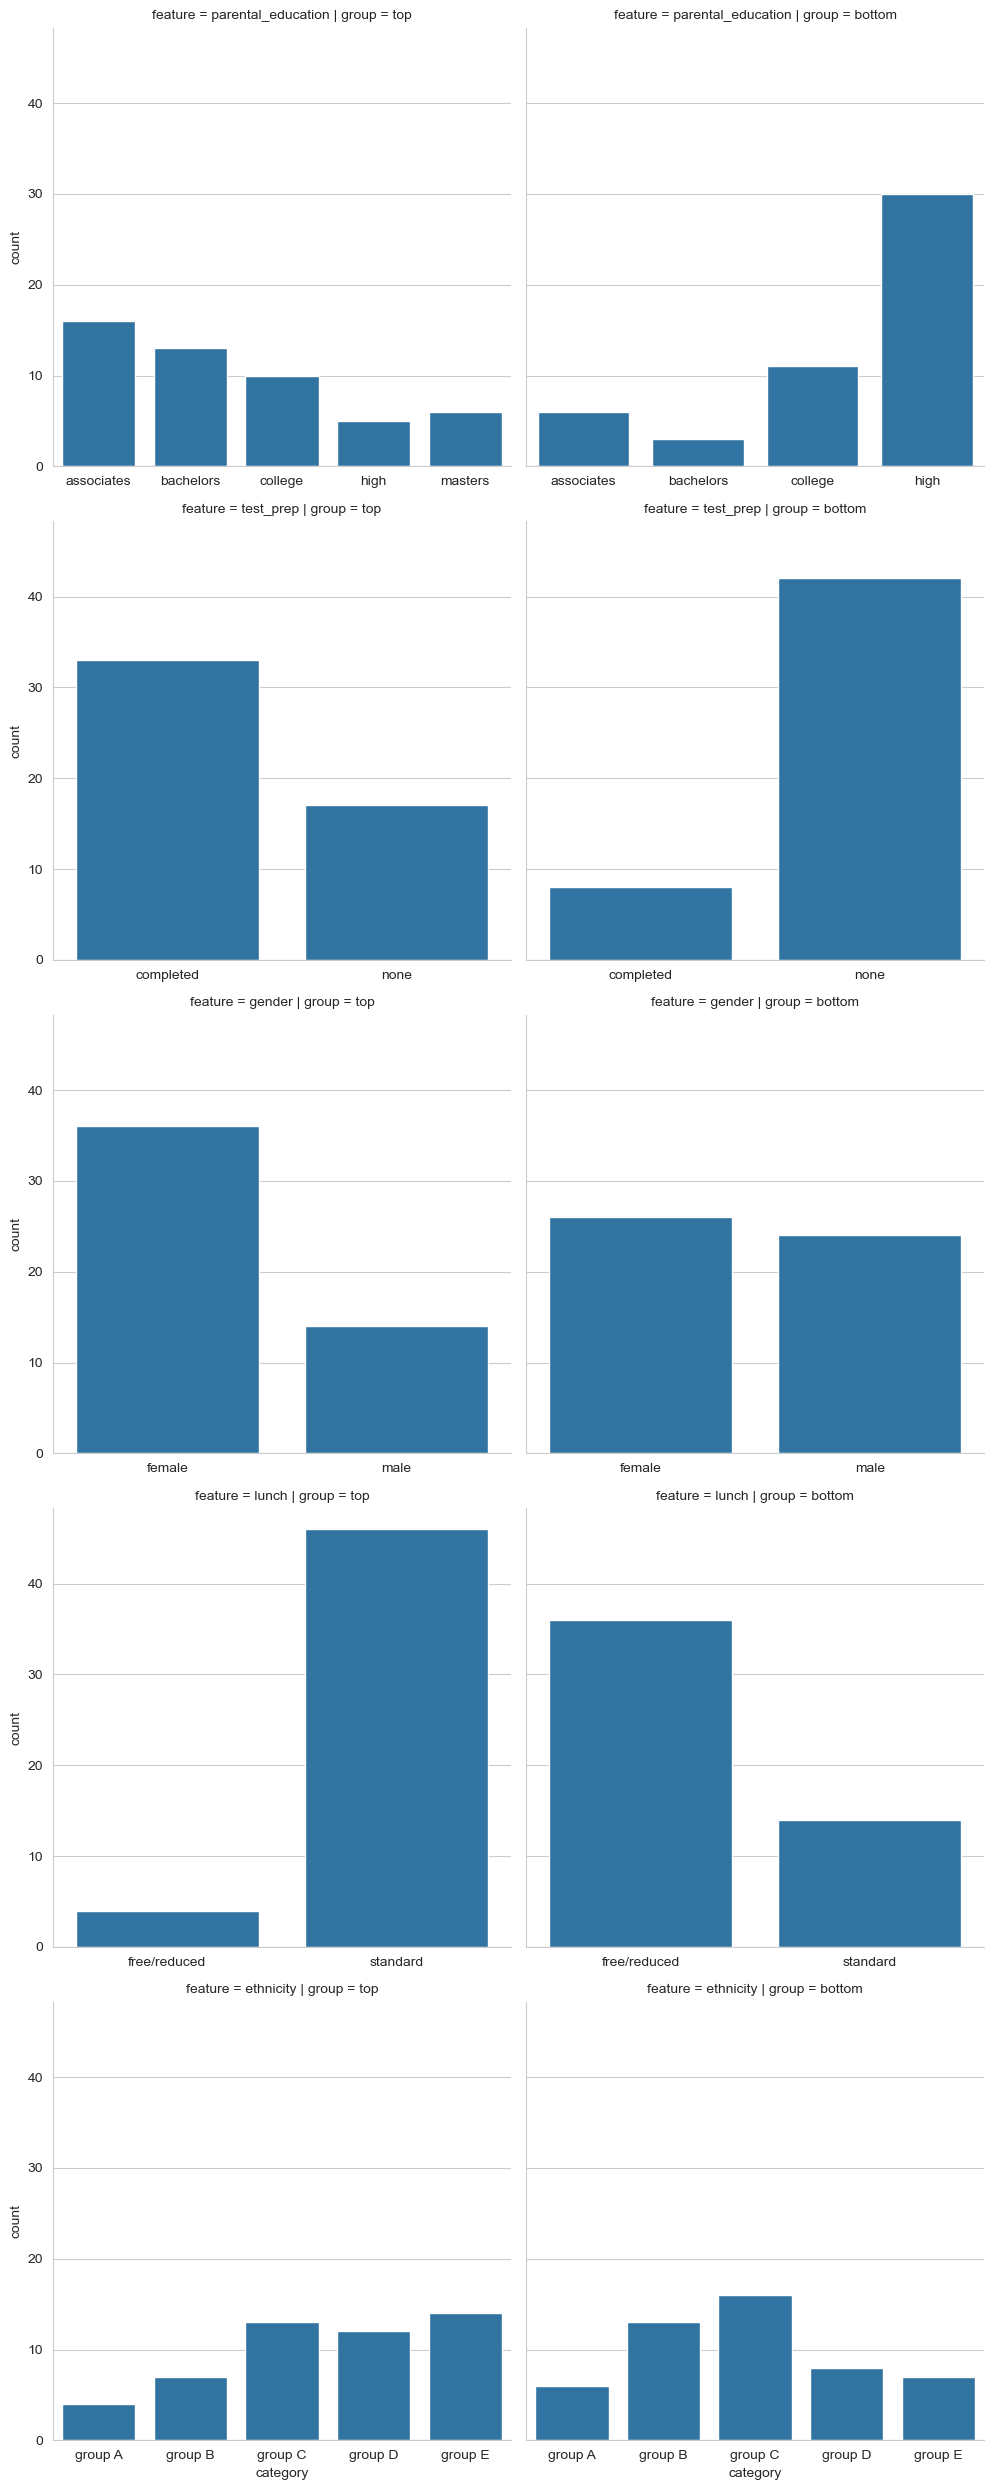

In [110]:
sns.catplot(outliers_melt, x="category", row="feature", col="group", sharex=False, kind="count", orient="h")

# Question 14

Pairwise Relationships: Create pairplots with the scores and color by gender and test prep

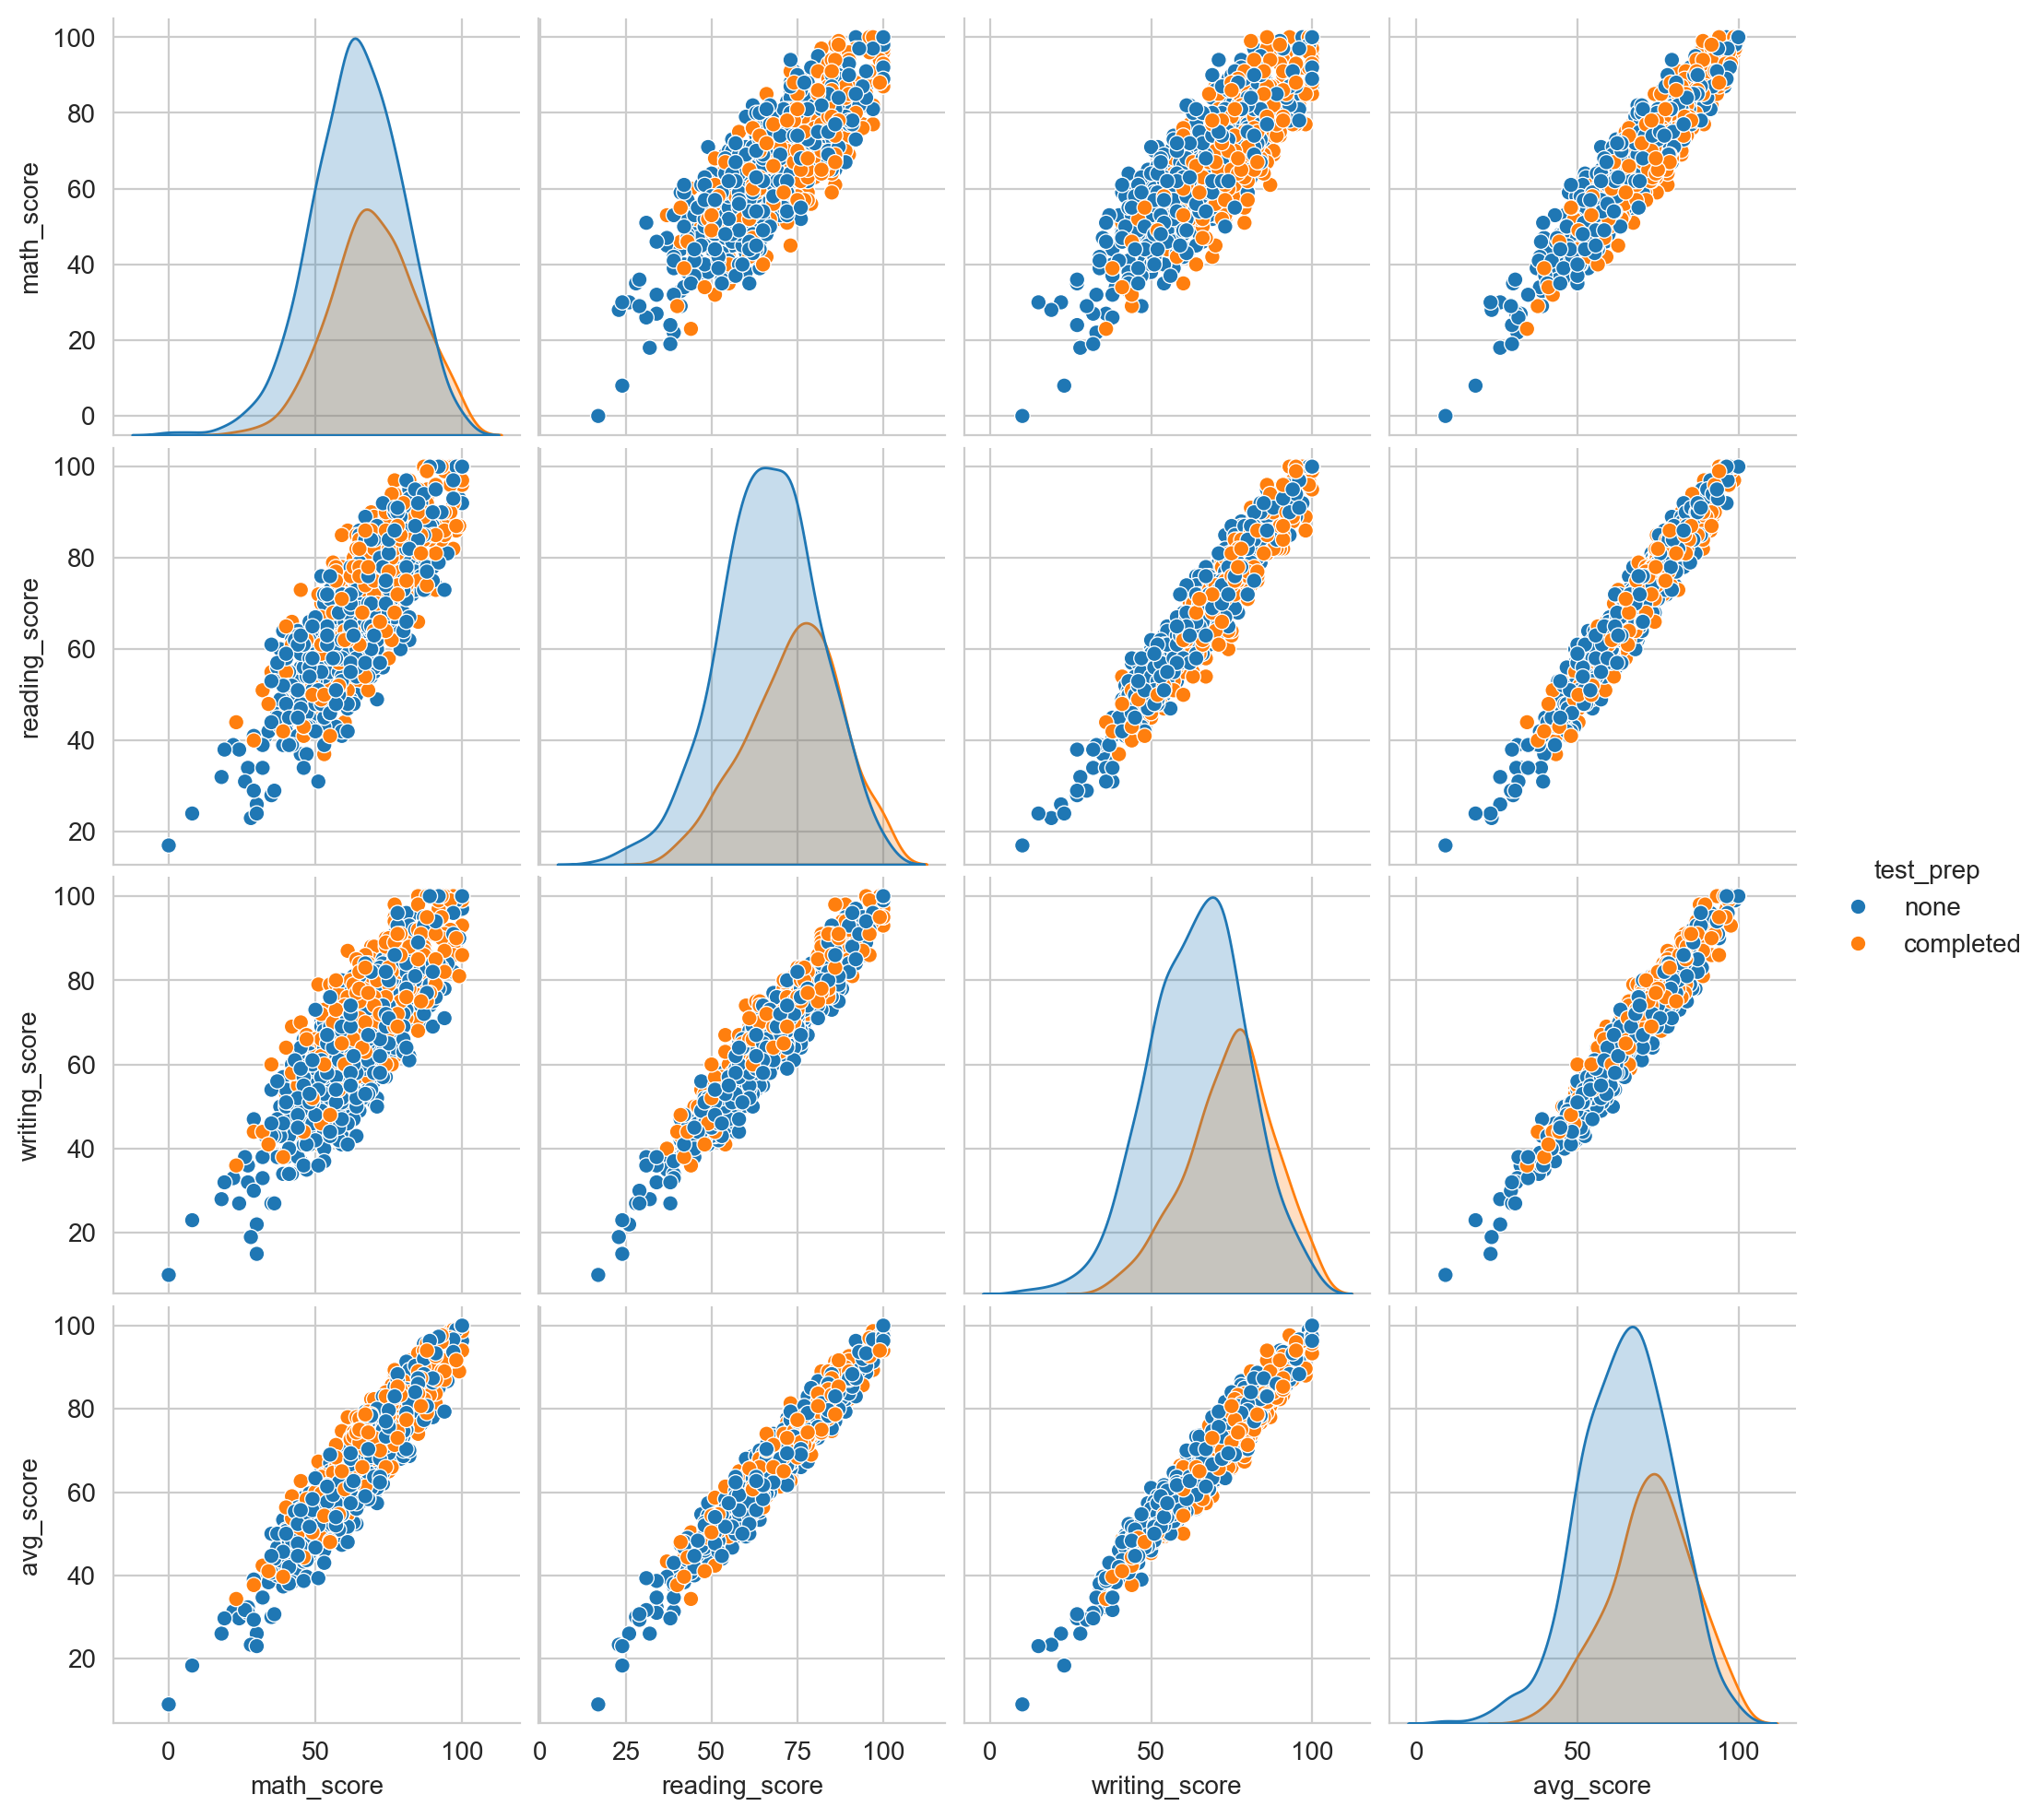

In [11]:
sns.pairplot(df, hue="test_prep", vars=["math_score", "reading_score", "writing_score", "avg_score"], kind="scatter")

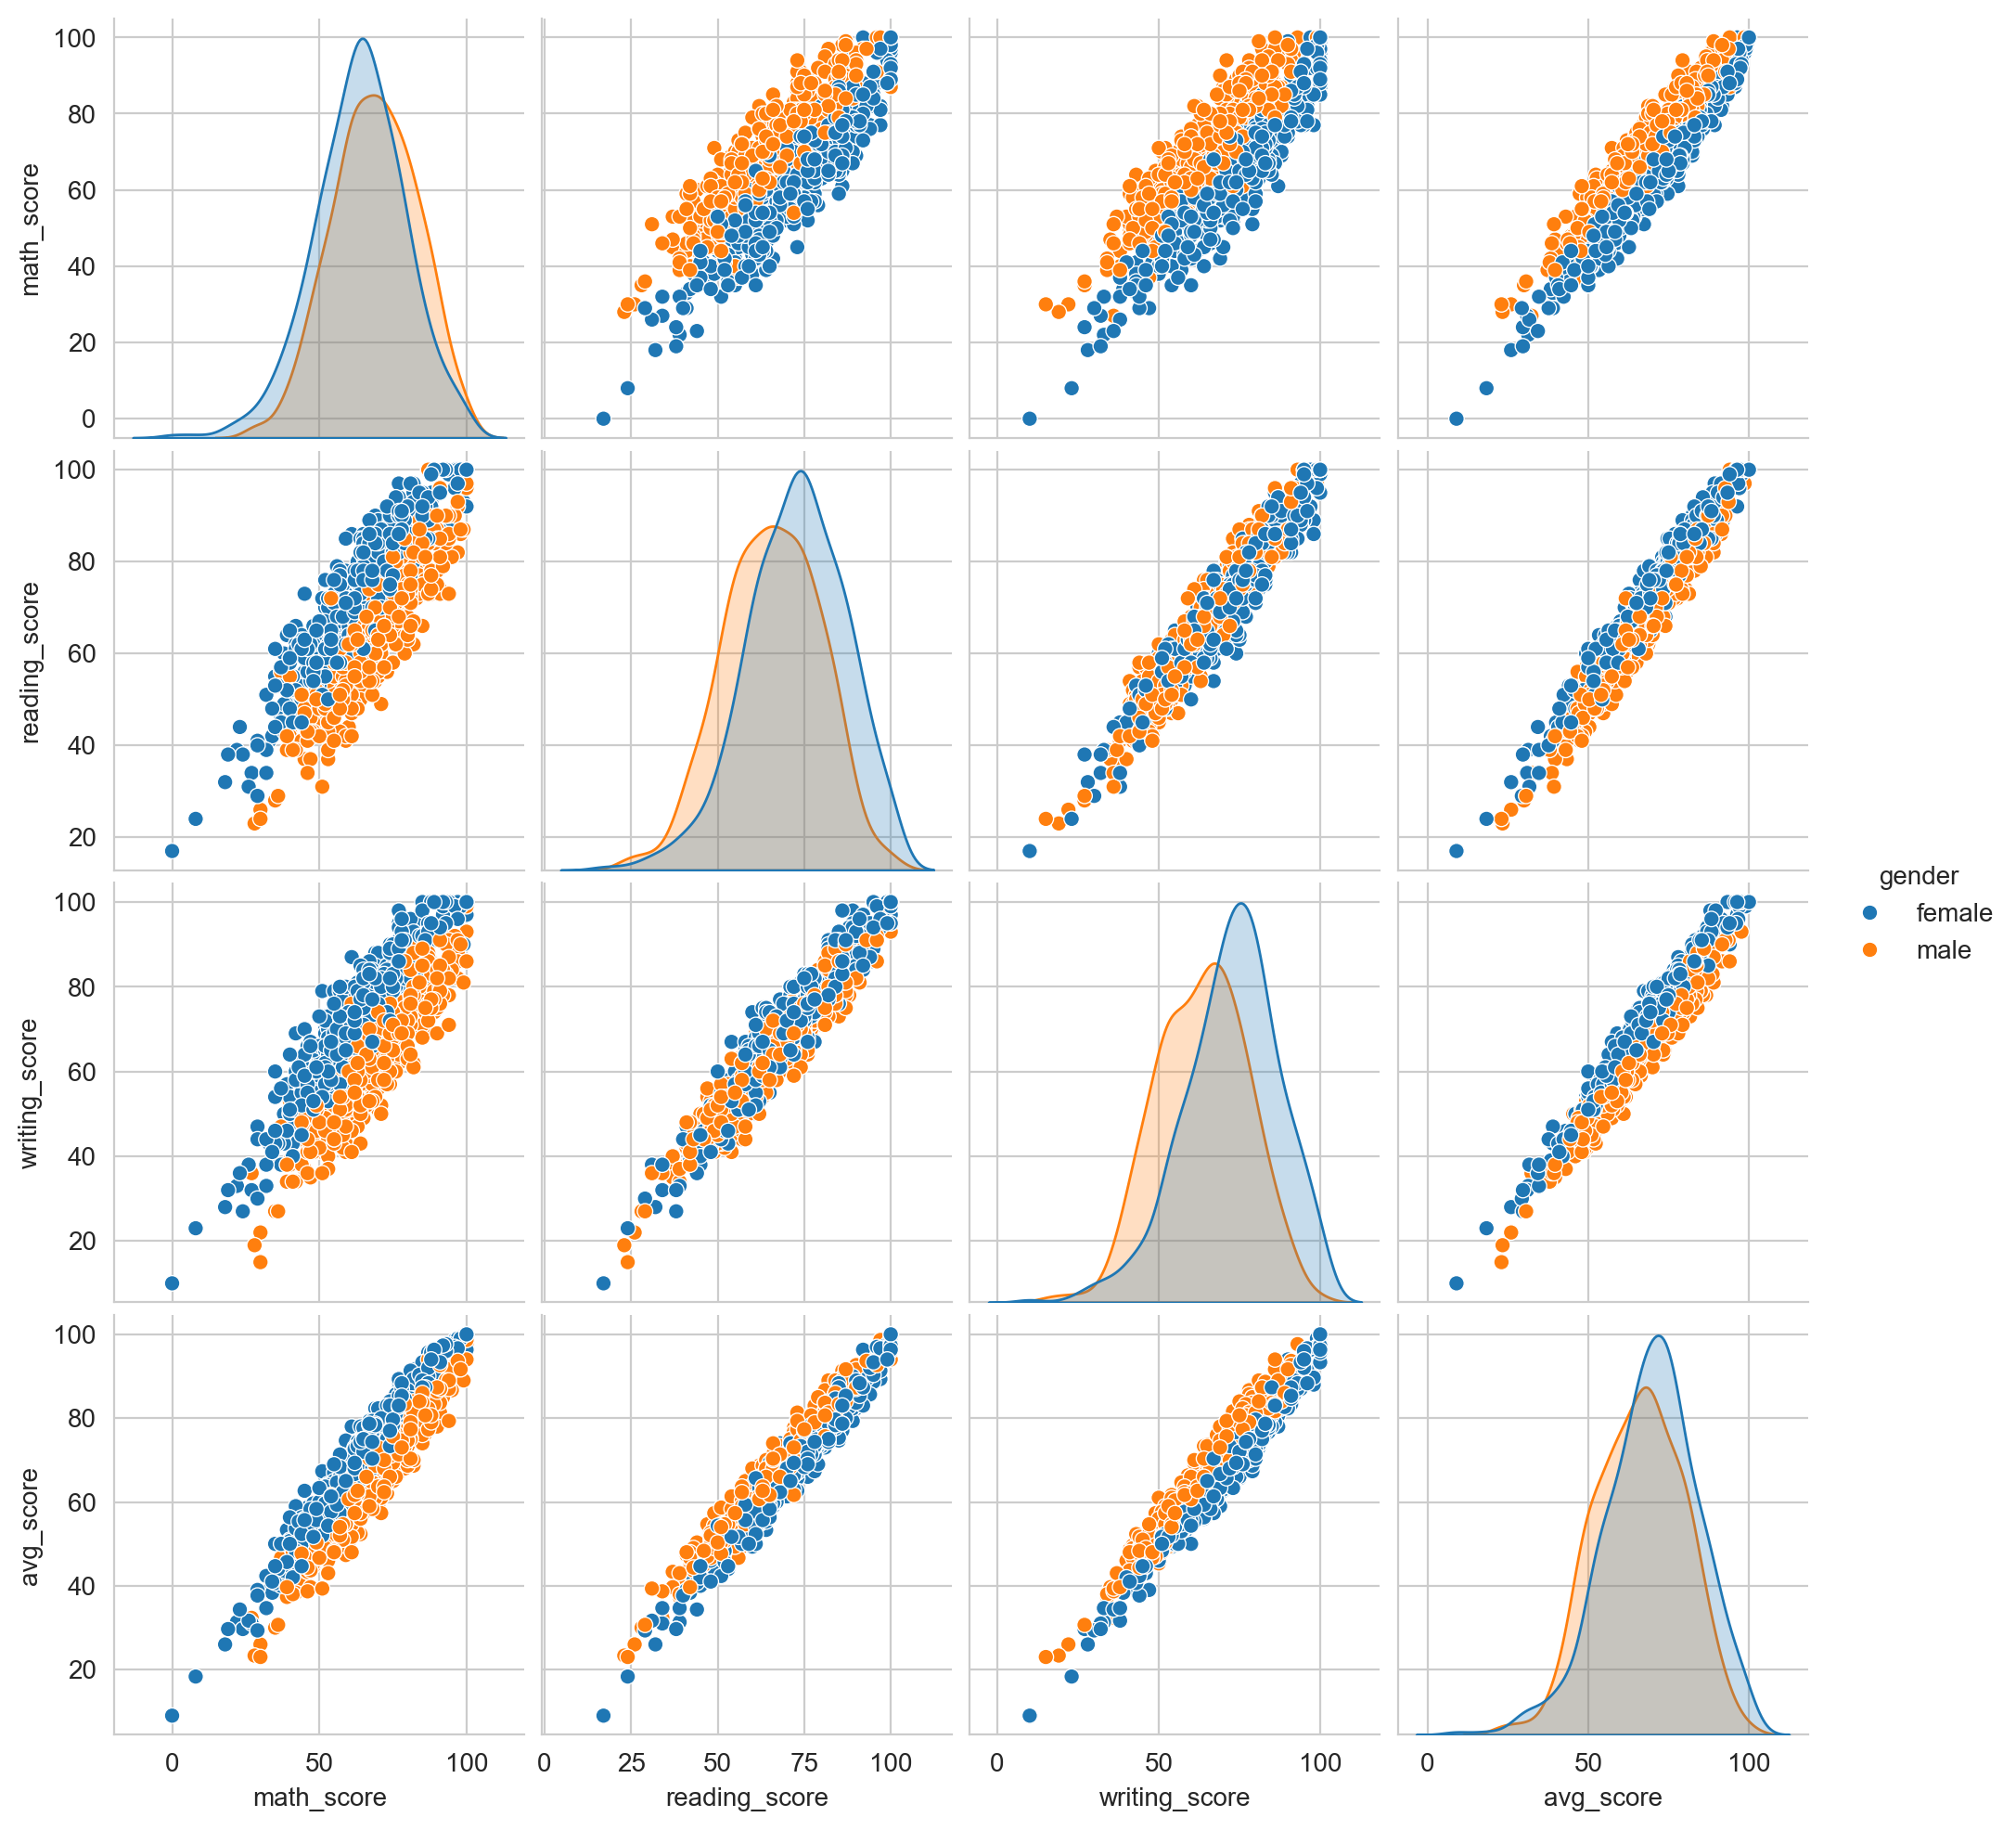

In [10]:
sns.pairplot(df, hue="gender", vars=["math_score", "reading_score", "writing_score", "avg_score"], kind="scatter")

# Question 14

Compare test prep impact overall and by parental education level

<Axes: xlabel='avg_score', ylabel='Count'>

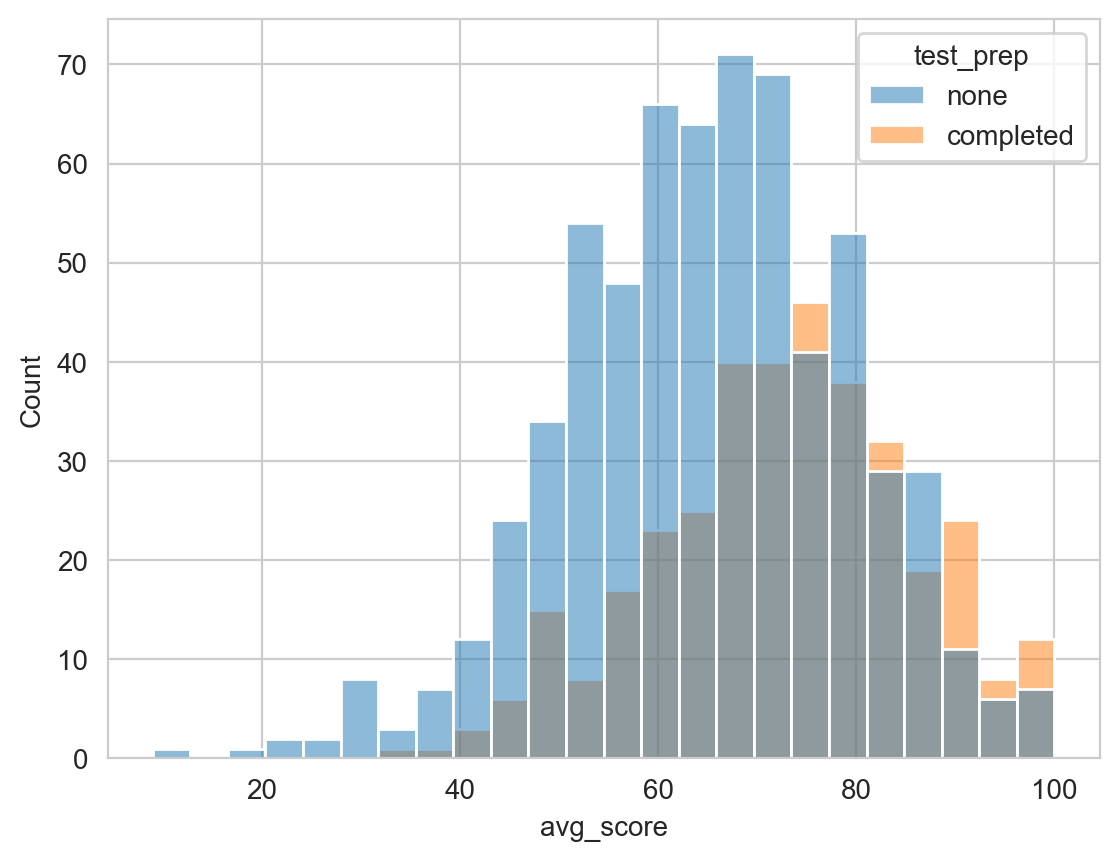

In [15]:
sns.histplot(df, x="avg_score", hue="test_prep")

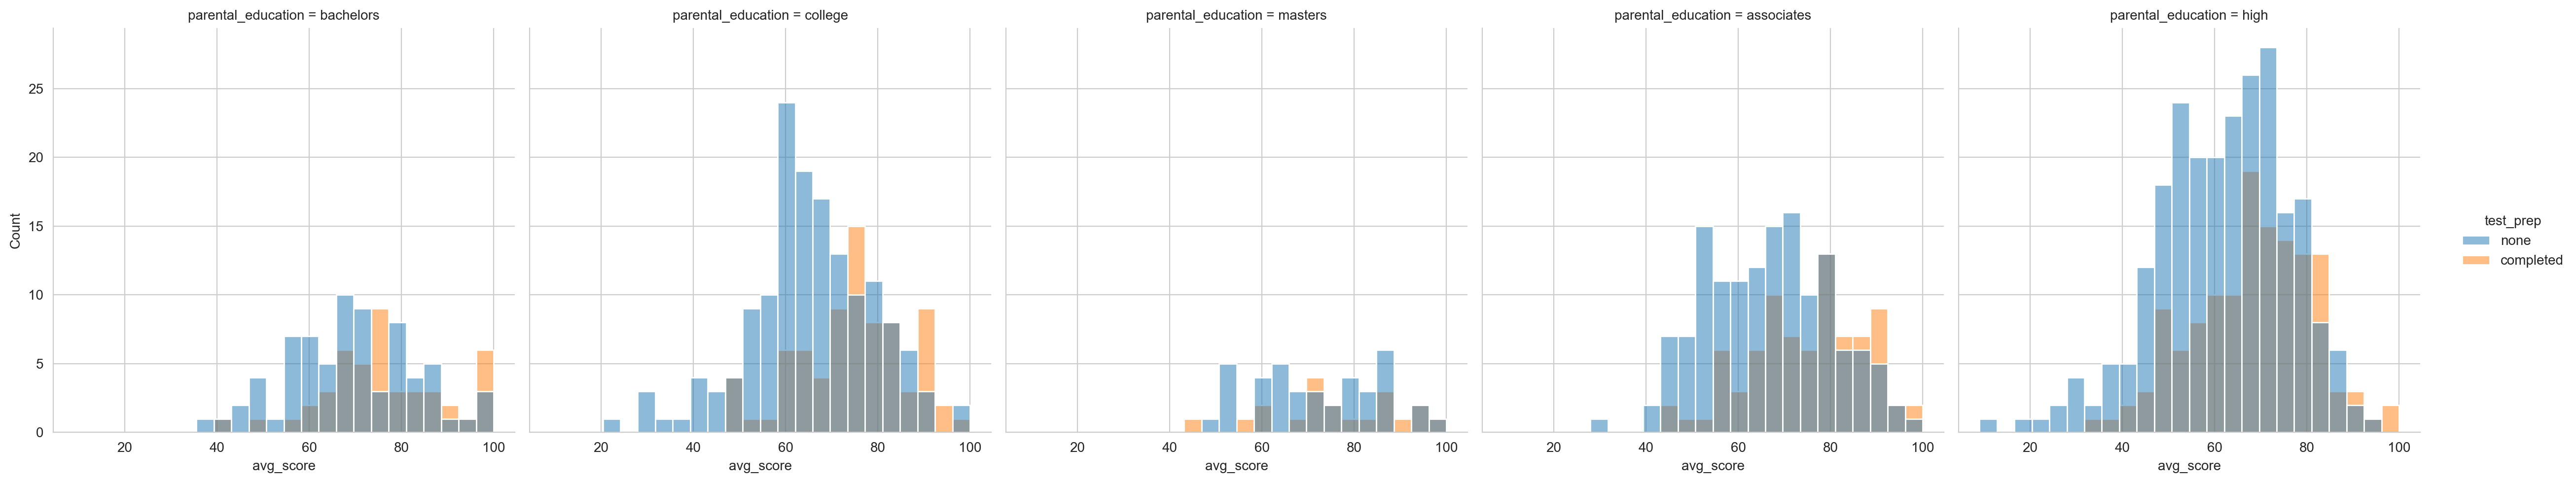

In [17]:
sns.displot(df, x="avg_score", hue="test_prep", col="parental_education")